In [1]:
# Import required libraries
#import pandas as pd
###from sklearn.datasets import load_iris
#from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis

In [2]:
import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd

/home/imager/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [3]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [4]:
import networkx as nx

In [ ]:
## DN and b1 analysis 


In [5]:
#fly_nums = range(1556,1565) + range(1566, 1567)#,1545)
#fly_nums = range(1566, 1570)
#multi_fly_df = util.construct_multi_fly_df(fly_nums)
#df = multi_fly_df


#fly_nums = range(1389,1402)#,1545)
#multi_fly_df = util.construct_multi_fly_df(fly_nums)


fly_nums = range(1706, 1709) + range(1711, 1714) + range (1715, 1719) + range(1719, 1722) + range(1722, 1727) + range(1729, 1730)# +   range(1731, 1732)## last one are the newest trials -- 
#figure out whats wrong with kine cam?
multi_fly_df = util.construct_multi_fly_df(fly_nums)

Making dataframe for fly number 1706
Making dataframe for fly number 1707
Making dataframe for fly number 1708
Making dataframe for fly number 1711
Making dataframe for fly number 1712
Making dataframe for fly number 1713
Making dataframe for fly number 1715
Making dataframe for fly number 1716
Making dataframe for fly number 1717
Making dataframe for fly number 1718
Making dataframe for fly number 1719
Making dataframe for fly number 1720
Making dataframe for fly number 1721
Making dataframe for fly number 1722
Making dataframe for fly number 1723
Making dataframe for fly number 1724
Making dataframe for fly number 1725
Making dataframe for fly number 1726
Making dataframe for fly number 1729


In [6]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))


# double_filtered_df = multi_fly_df.loc[idx]
# print(double_filtered_df)

['t' 'stimulus' 'amp_diff' 'left_amp' 'right_amp' 'fly_num' 'wbf'
 'experimental_condition' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right']
['exc_cl_starfield, g_x = 1, g_y=0, b_x =0, b_y = 0, ch=0'
 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'pretrial_stripe_fix'
 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'trials_ended' 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']


In [7]:
#print(filtered_df[key+'_right'])

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [8]:
#turn_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0']
#turn_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0']
#WSA_increase = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0']
#WSA_decrease = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0']



yaw_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
yaw_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
pitch_up = multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
pitch_down = multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
roll_cw = multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
roll_ccw = multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']





#yaw_left= multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#yaw_right= multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#pitch_up =  multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#pitch_down =  multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#roll_cw =  multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#roll_ccw =  multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
#ol_stripe_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_stripe, g_x=-70, g_y=0, b_x=0, b_y=0, ch=0']
#ol_stripe_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_stripe, g_x=70, g_y=0, b_x=0, b_y=0, ch=0']
#stripe_fix = multi_fly_df.loc[multi_fly_df['stimulus']== 'pretrial_stripe_fix']


In [9]:
#pitch_down_WS_decrease = pitch_down.loc[((pitch_down['experimental_condition']=='condition=test'))]

#pitch_up_WS_increase = pitch_up.loc[((pitch_up['experimental_condition']=='condition=test'))]

#roll_cw_right_increase = roll_cw.loc[((roll_cw['experimental_condition']=='condition=test'))]#

#roll_ccw_left_increase = roll_ccw.loc[((roll_ccw['experimental_condition']=='condition=test'))]

#yaw_right_right_increase = yaw_right.loc[((yaw_right['experimental_condition']=='condition=test'))]

#yaw_left_left_increase = yaw_left.loc[((yaw_left['experimental_condition']=='condition=test'))]

In [13]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
X, _ = load_digits(return_X_y=True)
transformer = FactorAnalysis(n_components=7, random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape
(1797, 7)


(1797, 7)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [15]:
def fit(self, X, feature_labels=None, estimator_params=None):
        """Fits an Sklearn FA model to X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.

        feature_labels : array-like, shape (n_features), optional
                         Labels for each of the features in X.

        estimator_params : dict, optional
                           The parameters to pass to Sklearn's FA estimators.


        Returns
        -------
        self
        """
        self._reset()
        if feature_labels is None:
            feature_labels = ["feature_{}".format(i) for i in range(X.shape[1])]   # feature labels being the muscles in this case? sorted_keys
        self.feature_labels_ = feature_labels
        self.model_ = SklearnFactorAnalysis()
        if estimator_params is not None:
            # Update Sklearn estimator params
            assert isinstance(estimator_params, dict)   ##make estimator params muscles dict?
            self.model_.set_params(**estimator_params)
        self.model_.fit(X)

        # Remove zero-valued components (n_components x n_features)
        components_mask = np.sum(self.model_.components_ != 0.0, axis=1) > 0.0
        self.components_ = self.model_.components_[components_mask]

        # Compute the % variance explained (with/without noise)
        c2 = np.sum(self.components_ ** 2, axis=1)
        self.total_variance_ = np.sum(c2)
        self.pvars_ = 100 * c2 / self.total_variance_
        self.pvars_noise_ = 100 * c2 / (self.total_variance_ +
                                        np.sum(self.model_.noise_variance_))
        return self 

In [16]:
select_df= pd.DataFrame()
select_df['left_amp'] = multi_fly_df['left_amp']
#select_df['right_amp'] = multi_fly_df['right_amp']
select_df['i1_left'] = multi_fly_df['i1_left']
#select_df['i1_right'] = multi_fly_df['i1_right']

In [17]:
#WSA_increase 
#left_turn
#right_turn
#WSA_decrease

yaw_left.columns.values

array(['t', 'stimulus', 'amp_diff', 'left_amp', 'right_amp', 'fly_num',
       'wbf', 'experimental_condition', 'pr_left', 'tpd_left', 'nm_left',
       'iii1_left', 'iii3_left', 'i2_left', 'hg2_left', 'hg3_left',
       'hg1_left', 'i1_left', 'bkg_left', 'b1_left', 'b2_left', 'b3_left',
       'iii24_left', 'hg4_left', 'pr_right', 'tpd_right', 'nm_right',
       'iii1_right', 'iii3_right', 'i2_right', 'hg2_right', 'hg3_right',
       'hg1_right', 'i1_right', 'bkg_right', 'b1_right', 'b2_right',
       'b3_right', 'iii24_right', 'hg4_right'], dtype=object)

In [27]:
#cull_list = [('left', 'bkg'), ('right', 'bkg'),  #('left', 'bkg'),
#            ('left', 'iii24'),('right', 'iii24'),
#            ('left', 'nm'),('right', 'nm'),
#            ('left', 'pr'),('right', 'pr'),
#            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

#for cull in cull_list:
#   yaw_left = yaw_left.drop([cull[1]+'_'+cull[0]], axis=1)

### things above no longer necessary


yaw_left = yaw_left.drop(['t'], axis = 1)
yaw_left = yaw_left.drop(['stimulus'], axis =1)
yaw_left = yaw_left.drop(['amp_diff'], axis= 1)
yaw_left = yaw_left.drop(['left_amp'], axis = 1) 
yaw_left = yaw_left.drop(['right_amp'], axis =1) 
yaw_left = yaw_left.drop(['fly_num'], axis =1) 
yaw_left = yaw_left.drop(['wbf'], axis =1)
yaw_left = yaw_left.drop(['experimental_condition'], axis=1)

ValueError: labels ['t'] not contained in axis

In [28]:
type(yaw_left)
np.shape(yaw_left)

(81584, 32)

In [29]:
factor_yaw_left = FactorAnalysis().fit(yaw_left)

In [21]:
col_names = yaw_left.columns.values

In [30]:
d = pd.DataFrame(factor_yaw_left.components_,columns = col_names)
d

,pr_left,tpd_left,nm_left,iii1_left,iii3_left,i2_left,hg2_left,hg3_left,hg1_left,i1_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
0,0.007129,0.073204,0.071038,0.074160,-0.128517,0.123265,0.091899,0.030450,0.109550,0.186294,...,0.081346,0.002109,0.029265,0.023894,0.081203,-0.016028,0.046005,-0.009822,-0.003995,-0.031504
1,-0.026586,-0.095965,-0.037745,0.063995,-0.158204,0.087998,-0.004849,-0.037353,-0.000723,0.035028,...,0.012881,-0.033766,-0.022387,-0.025083,-0.017843,-0.196185,-0.013480,-0.168359,-0.012577,-0.044385
2,0.054415,-0.057377,-0.087259,0.019718,0.088504,0.001173,0.027341,0.009894,0.002265,-0.031033,...,0.051817,-0.005899,0.077399,0.109691,0.025147,-0.020911,-0.012728,0.063678,-0.031939,0.023074
3,-0.011635,-0.026026,-0.009738,-0.049853,-0.009168,-0.074012,0.055143,0.098706,0.048129,-0.000365,...,-0.019463,-0.007630,0.000485,0.000541,-0.002677,-0.002691,0.001439,-0.004928,-0.033100,-0.028574
4,-0.006170,-0.020345,0.011635,0.001032,0.024052,-0.038422,0.033742,0.022170,-0.013882,-0.041661,...,0.013702,0.025309,-0.013610,-0.018356,0.019199,-0.046329,-0.013683,-0.022319,0.041596,-0.004887
5,0.017029,-0.034792,0.002761,-0.028052,-0.047630,0.003119,-0.023666,-0.027210,0.004922,0.009740,...,-0.005232,0.005990,0.007845,0.004874,0.004692,-0.003198,-0.002133,-0.025886,-0.006677,0.005750
6,0.002735,0.010663,-0.008838,-0.003181,-0.010016,0.003178,0.005910,0.013439,0.009125,0.007643,...,0.007483,0.020492,-0.002475,-0.003335,-0.009130,-0.010820,0.008422,-0.000285,0.005040,0.038407
7,-0.007043,-0.009629,0.008428,-0.010651,-0.014954,0.015065,-0.000521,-0.000788,0.004231,-0.001672,...,0.006103,0.001173,0.005276,0.001171,-0.008315,0.012151,0.015082,0.001952,-0.001883,-0.000119
8,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
9,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000


In [ ]:
#Descending interneurons 



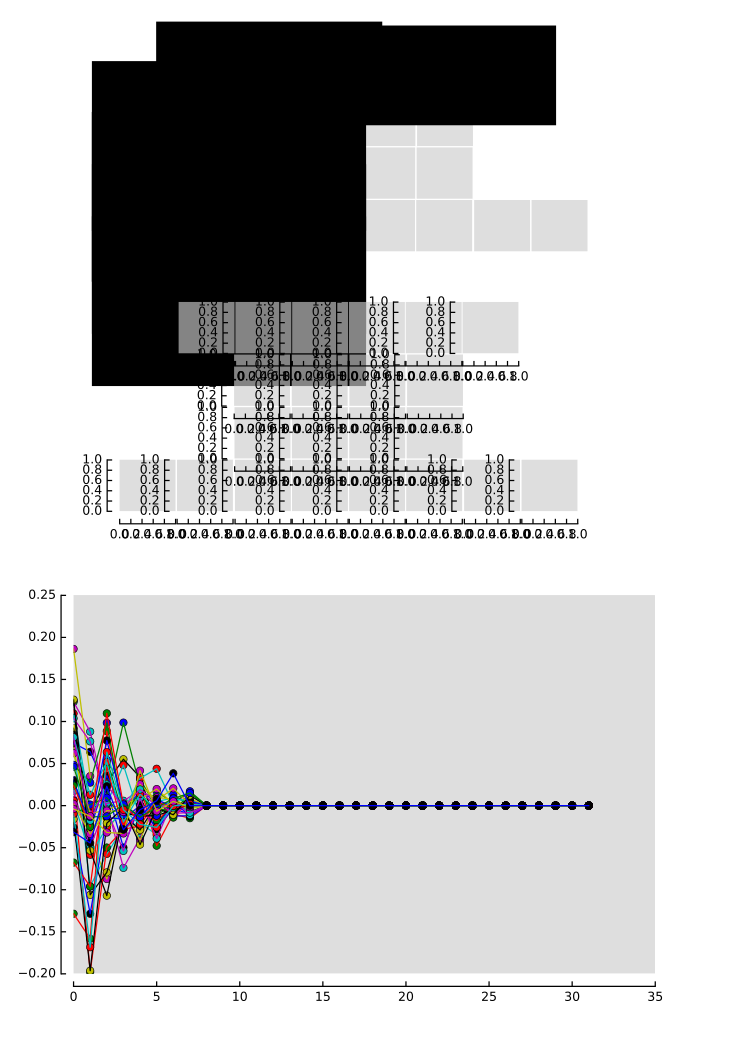

In [31]:
layout = fifi.FigureLayout('activity_heatmap_layout.svg',make_mplfigures = True)

#layout.axes['ind_cell_A_ts_1'].plot(times[1500:1600]-times[1500],cell_A_ind_F_1[1500:1600])
#layout.axes['ind_cell_B_ts_1'].plot(times[1500:1600]-times[1500],cell_B_ind_F_1[1500:1600])

#layout.axes['coup_cell_A_ts_1'].plot(times[1500:1600]-times[1500],cell_A_coup_F_1[1500:1600]#)
#layout.axes['coup_cell_B_ts_1'].plot(times[1500:1600]-times[1500],cell_B_coup_F_1[1500:1600])


for col in col_names: 
    layout.axes['heat_map'].plot(d[col], 'o')
    layout.axes['heat_map'].plot(d[col])
#norm=LogNorm(vmin=Z.min(), vmax=Z.max()), cmap='PuBu_r')
#fig.colorbar(c, ax=ax0)



#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)
#color=cmap(norm(full_matrix_2))
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])  # only needed for matplotlib < 3.1
#fig.colorbar(sm)

fifi.mpl_functions.set_spines(layout)
layout.save('factor_analysis_yaw_left.svg')
plt.close('all')
display(SVG('factor_analysis_yaw_left.svg'))

In [32]:

#from factor_analyzer import FactorAnalyzer

def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

#fa = FactorAnalyzer()
#fa.analyze(d, 6, rotation="varimax")

v = varimax(d)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars


In [33]:

## turn this into promax rotation
### keep track on the factors in rotation 


def promax (Phi, gamma =1, q= 6, tol = 1e -6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape


def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

#fa = FactorAnalyzer()
#fa.analyze(d, 6, rotation="varimax")

v = varimax(d)

SyntaxError: invalid syntax (<ipython-input-33-5881761f4cde>, line 6)

In [34]:
v

array([[  5.12827628e-17,  -5.33427469e-17,   5.24753851e-17, ...,
          1.66967135e-17,  -6.88400626e-04,   1.05170073e-05],
       [ -1.75640752e-17,   1.94722710e-16,   2.60208521e-18, ...,
         -3.01408204e-17,   4.74360648e-04,   2.20904383e-05],
       [ -5.80590263e-17,   0.00000000e+00,   3.46944695e-18, ...,
          2.39608680e-17,   1.04856841e-03,   3.83926287e-05],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [35]:
m = d #fa.components_
n = v #fa.noise_variance_

m1 = m**2

m2 = np.sum(m1,axis=1)

pvar1 = (100*m2[0])/np.sum(m2)
pvar2 = (100*m2[1])/np.sum(m2)
pvar3 = (100*m2[2])/np.sum(m2)
pvar4 = (100*m2[3])/np.sum(m2)
pvar5 = (100*m2[4])/np.sum(m2)
pvar6 = (100*m2[5])/np.sum(m2)
pvar7 = (100*m2[6])/np.sum(m2)
pvar8 = (100*m2[7])/np.sum(m2)
pvar9 = (100*m2[8])/np.sum(m2)
pvar10 = (100*m2[9])/np.sum(m2)
pvar11 = (100*m2[10])/np.sum(m2)
pvar12 = (100*m2[11])/np.sum(m2)
pvar13 = (100*m2[12])/np.sum(m2)
pvar14 = (100*m2[13])/np.sum(m2)
pvar15 = (100*m2[14])/np.sum(m2)
pvar16 = (100*m2[15])/np.sum(m2)
pvar17 = (100*m2[16])/np.sum(m2)
pvar18 = (100*m2[17])/np.sum(m2)
pvar19 = (100*m2[18])/np.sum(m2)
pvar20 = (100*m2[19])/np.sum(m2)
pvar21 = (100*m2[20])/np.sum(m2)
pvar22 = (100*m2[21])/np.sum(m2)


pvar1_with_noise = (100*m2[0])/(np.sum(m2)+np.sum(n))
pvar2_with_noise = (100*m2[1])/(np.sum(m2)+np.sum(n))

per_dav_df = pd.DataFrame()
per_dav_df['pvars']= [pvar1 , pvar2, pvar3, pvar4, pvar5, pvar6, pvar7, pvar8, pvar9, pvar10, pvar11, pvar12, pvar13, pvar14, pvar15, pvar16, pvar17, pvar18, pvar19, pvar20, pvar21, pvar22]

In [36]:
pvar1

33.265026657421316

In [37]:
pvar2

38.96418538835001

In [38]:
pvar3 

15.553423054500099

In [39]:
pvar4

5.7888133494717113

In [40]:
pvar5

3.1210373438762304

In [41]:
pvar6

2.207677426737789

In [42]:
pvar7

0.66621470527020232

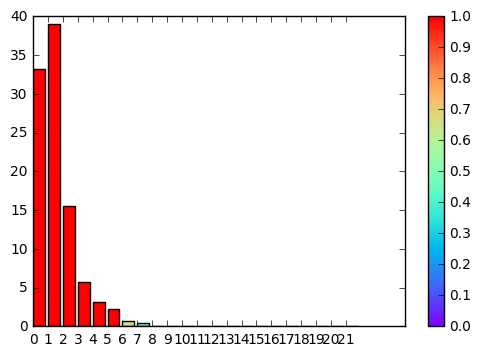

In [43]:
#Percentage of variance explained by each factor

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(22)
y = list(per_dav_df['pvars'])#*(10^160))
c = list(per_dav_df['pvars'])#*(10^160))
df = pd.DataFrame({"x":x,"y":y,"c":c})

cmap = plt.cm.rainbow
#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap((df.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap)#, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

In [ ]:
#implement different factor analysis

In [ ]:
#### Normalize prior to rotations/ factor analysis 


In [9]:
def min_max_tonic_range(data):
    data = data
    # best fit of data
    (mu, sigma) = norm.fit(data)

    # the histogram of the data
    n, bins, patches = plt.hist(data, 100, normed=1, facecolor='green', alpha=0.75)

    # add a 'best fit' line
    y = mlab.normpdf( bins, mu, sigma)
    #l = plt.plot(bins, y, 'r--', linewidth=2)

    mmin = mu - (2*sigma)
    mmax = mu + (2*sigma)
    
    return (mu, sigma, mmin, mmax)

In [10]:
def normd_mods(muscle_data):
        mu, sigma, mmin, mmax = min_max_tonic_range(muscle_data)
        xno = muscle_data
        normalized = (xno-mmin)/(max(xno)-mmin)
        return normalized

In [11]:
normed_multi_fly_df = pd.DataFrame()

for flynum in fly_nums:
    df=multi_fly_df.loc[multi_fly_df['fly_num']==flynum]
    for key in sorted_keys: 
        a = normd_mods(df[key])
        df[key] = a
    normed_multi_fly_df = normed_multi_fly_df.append(df)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/dist-packages/matplotlib/mlab.py:1587: RuntimeWarning: divide by zero encountered in double_scalars
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)
/usr/lib/python2.7/dist-packages/matplotlib/mlab.py:1587: RuntimeWarning: invalid value encountered in multiply
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)


In [12]:
yaw_left = normed_multi_fly_df.loc[normed_multi_fly_df['stimulus']== 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
yaw_right = normed_multi_fly_df.loc[normed_multi_fly_df['stimulus']== 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
pitch_up = normed_multi_fly_df.loc[normed_multi_fly_df['stimulus']== 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
pitch_down = normed_multi_fly_df.loc[normed_multi_fly_df['stimulus']== 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
roll_cw = normed_multi_fly_df.loc[normed_multi_fly_df['stimulus']== 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
roll_ccw = normed_multi_fly_df.loc[normed_multi_fly_df['stimulus']== 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']




In [26]:
yaw_left = yaw_left.fillna(0)
yaw_right = yaw_right.fillna(0)
pitch_up = pitch_up.fillna(0)
pitch_down = pitch_down.fillna(0)
roll_cw = roll_cw.fillna(0)
roll_ccw = roll_ccw.fillna(0)




In [40]:
cull_list = [('left', 'bkg'), ('right', 'bkg'),  #('left', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    yaw_left = yaw_left.drop([cull[1]+'_'+cull[0]], axis=1)

WSA_increase = WSA_increase.drop(['t'], axis = 1)
WSA_increase = WSA_increase.drop(['stimulus'], axis =1)
WSA_increase = WSA_increase.drop(['amp_diff'], axis= 1)
WSA_increase = WSA_increase.drop(['left_amp'], axis = 1) 
WSA_increase = WSA_increase.drop(['right_amp'], axis =1) 
WSA_increase = WSA_increase.drop(['fly_num'], axis =1) 
WSA_increase = WSA_increase.drop(['wbf'], axis =1)
WSA_increase = WSA_increase.drop(['experimental_condition'], axis=1)


type(WSA_increase)
np.shape(WSA_increase)


factor_WSA_inc = FactorAnalysis().fit(WSA_increase)

In [ ]:
othrogonal
vs 
oblique
vs
varimax rotations

normalization of matrices and correlations

all rotations to extract relevant features


In [ ]:
add oblique